<h1><font color="#113D68" size=5>Deep Learning para Procesamiento del Lenguaje Natural</font></h1>



<h1><font color="#113D68" size=6>2. Procesamiento de texto con scikit-learn</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. El modelo de la bolsa de palabras](#section1)
* [2. Contar palabras con `CountVectorizer`](#section2)
* [3. Frecuencias de palabras con `TfidfVectorizer`](#section3)
* [4. Hashing con `HashingVectorizer`](#section4)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

El texto debe analizarse para eliminar palabras (__tokenización__). Luego, las palabras deben codificarse como números enteros o valores de punto flotante para usar como entrada en un algoritmo de aprendizaje automático, i.e., extracción de características (__vectorización__). En este tutorial, aprenderemos como procesar texto con scikit-learn, específicamente veremos:
- Convertir texto en vectores de conteo de palabras con `CountVectorizer`.
- Convertir texto a vectores de frecuencia de palabras con `TfidfVectorizer`.
- Convertir texto en enteros únicos con `HashingVectorizer`.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. El modelo de la bolsa de palabras</font>

No se puede trabajar con texto directamente cuando usamos algoritmos de Machine Learning, sino que debemos convertir el texto a números. Los algoritmos toman vectores de números como entrada, por lo tanto, necesitamos convertir el documento en vectores de números de longitud fija.

El modelo de bolsa de palabras (__BoW__, por sus siglas del inglés) elimina toda la información de orden en las palabras y se enfoca en la aparición de palabras en un documento, asignando a cada palabra un número único. Entonces:
- Cualquier documento que veamos puede codificarse como un vector de longitud fija con la longitud del vocabulario de palabras conocidas.
- El valor en cada posición en el vector podría completarse con un recuento o frecuencia de cada palabra en el documento codificado.

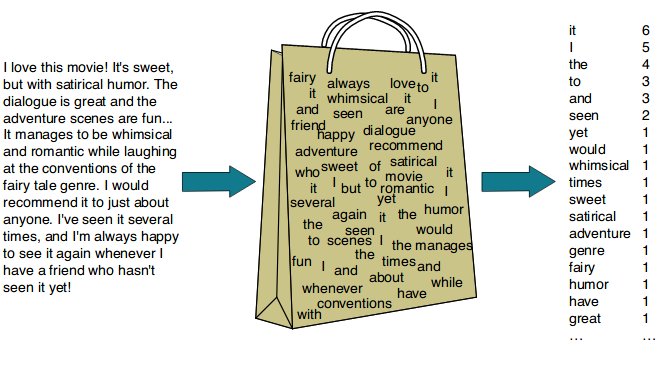

La biblioteca scikit-learn proporciona 3 esquemas diferentes que podemos usar.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Contar de palabras con `CountVectorizer`</font>

`CountVectorizer` proporciona:
- Una forma sencilla de tokenizar una colección de documentos de texto y crear un vocabulario de palabras conocidas.
- Codificar nuevos documentos utilizando ese vocabulario.

El procedimiento de uso:
1. Crear una instancia de la clase `CountVectorizer`.
2. Llamar a la función `fit()` para aprender un vocabulario de uno o más documentos.
3. Llamar a la función `transform()` en uno o más documentos según sea necesario para codificar cada uno como un vector.
4. Se devuelve un vector codificado con la longitud de todo el vocabulario y un número entero para el número de veces que apareció cada palabra en el documento.
    - Debido a que estos vectores contendrán muchos ceros, los llamamos dispersos.
    - El paquete `scipy.sparse` proporciona una manera eficiente de manejar vectores dispersos.
5. Los vectores devueltos por una llamada a `transform()` serán vectores dispersos
6. Puede volver a transformarlos en matrices NumPy con la función `toarray()`.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre la clase [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

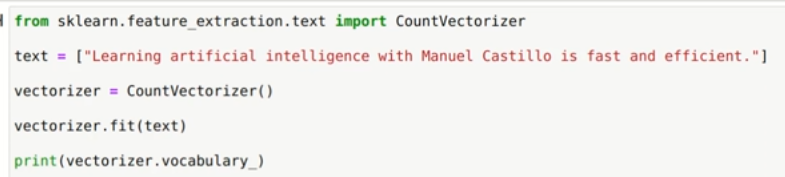

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["Learning artificial intelligence with Manuel Castillo is fast and efficient and amazing."]
vectorizer = CountVectorizer()
vectorizer.fit(text)
print(vectorizer.vocabulary_)

vector = vectorizer.transform(text)
#print(vector.shape())
print(type(vector))
print(vector.toarray())


{'learning': 8, 'artificial': 2, 'intelligence': 6, 'with': 10, 'manuel': 9, 'castillo': 3, 'is': 7, 'fast': 5, 'and': 1, 'efficient': 4, 'amazing': 0}
<class 'scipy.sparse._csr.csr_matrix'>
[[1 2 1 1 1 1 1 1 1 1 1]]


Podemos acceder al volucabulario específico mediante la propiedad:

In [ ]:
print(vectorizer.vocabulary_)

{'artificial': 1, 'intelligence': 2, 'is': 4, 'very': 5, 'interesting': 3, 'area': 0}


Algunos detalles:
- Todas las palabras se escribieron en minúsculas.
- Se ignoró la puntuación.
- Se tienen 10 palabras en el vocabulario.
- Se tiene u nvector de longitud de vocabulario, i.e., 10.
- Se codifica cada palabra por orden alfabético.

El mismo vectorizador se puede utilizar en otros documentos:
- Si no están incluidas en su vocabulario, entonces se ignoran.
- Si esta incluida, la tiene en cuenta.

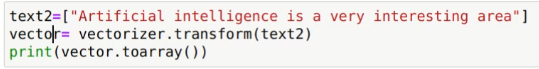

In [ ]:
text2 = ["Artificial intelligence is a very interesting area"]
vector = vectorizer.transform(text2)
print(vectorizer.vocabulary_)

print(vector.toarray())

{'learning': 8, 'artificial': 2, 'intelligence': 6, 'with': 10, 'manuel': 9, 'castillo': 3, 'is': 7, 'fast': 5, 'and': 1, 'efficient': 4, 'amazing': 0}
[[0 0 1 0 0 0 1 1 0 0 0]]


Los vectores codificados luego se pueden usar directamente con un algoritmo de aprendizaje automático.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. Frecuencias de palabras con `TfidfVectorizer`</font>

Un problema con los recuentos simples es palabras como _the_ aparecerán muchas veces cuando no añade mucha información de contexto.

Para mitigarlo, se usa el método _Term Frequency - Inverse Document Frequency_ (TF-IDF) que significa:
- __Frecuencia de términos__: ¿Con qué frecuencia el término aparece en este documento? Mientras mayor sea la frecuencia del término en el documento, mayor será su importancia.
- __Frecuencia de documento inversa__: ¿Con qué frecuencia el término aparece en todos los documentos de la colección? Mientras mayor sea la frecuencia en los documentos, menor será la importancia del término.

`TfidfVectorizer` tokenizará documentos, aprenderá el vocabulario y el documento inverso sobre ponderaciones de frecuencia y permitirá codificar nuevos documentos.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre la clase [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

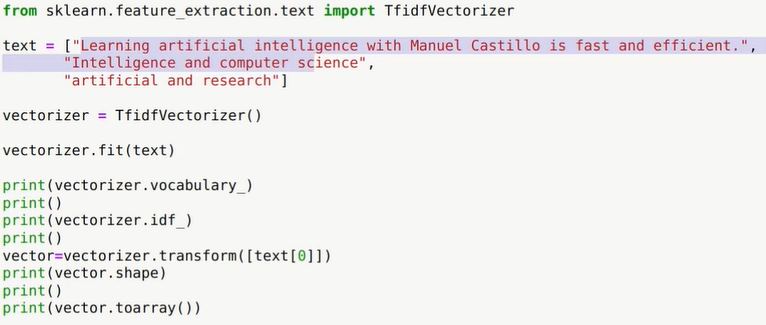

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["Learning artificial intelligence with Manuel Castillo is fast and efficient.", " Intelligence and computer science", " artificial and research" ]
vectorizer = TfidfVectorizer()
vectorizer.fit(text)
print(type(vectorizer.vocabulary_))
print(len(vectorizer.vocabulary_))
print()
print(vectorizer.idf_)
print()
vector = vectorizer.transform([text[0]])
print(vector.shape)
print()
print(vector.toarray())

<class 'dict'>
13

[1.         1.28768207 1.69314718 1.69314718 1.69314718 1.69314718
 1.28768207 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718]

(1, 13)

[[0.20251264 0.2607719  0.34288371 0.         0.34288371 0.34288371
  0.2607719  0.34288371 0.34288371 0.34288371 0.         0.
  0.34288371]]


- Se aprende un vocabulario de 13 palabras
- A cada palabra se le asigna un índice entero único en el vector de salida.
- Las frecuencias inversas del documento se calculan para cada palabra del vocabulario
- Se le asigna la puntuación más baja de 1 a la palabra con mayor frecuencia: _and_ en el índice 0.
- El primer documento se codifica como una matriz dispersa de 13 elementos con el puntaje de cada palabra.
- Las que sale con 0 es porque no se encuentra, e.g., _computer_
- Las puntuaciones se normalizan a valores entre 0 y 1

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. Hashing con `HashingVectorizer`</font>

Los conteos y las frecuencias tienen la limitación de que el vocabulario se vuelve muy extenso y requerirá grandes vectores para codificar documentos que requerirán, a su vez, grandes requisitos en memoria.

Una solución es usar un hash de palabras unidireccional para convertirlas en números enteros:
- No se requiere vocabulario
- Se puede elegir un vector de longitud fija de longitud arbitraria.
- Inconveniente: es una función unidireccional, i.e., no hay forma de volver a convertir la codificación en una palabra.

La clase `HashingVectorizer` implementa este enfoque que se puede usar para hash palabras, luego tokenizar y codificar documentos según sea necesario.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre la clase [`HashingVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html)

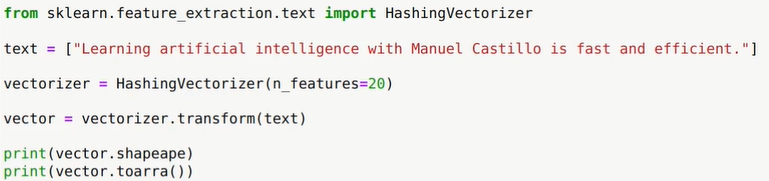

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
text = ["Learning artificial intelligence with Manuel Castillo is fast and efficient."]
vectorizer = HashingVectorizer(n_features=22)
vector = vectorizer.transform(text)

print(vector.shape)
print(vector.toarray())

(1, 22)
[[ 0.          0.26726124  0.          0.53452248  0.          0.
   0.         -0.53452248 -0.26726124 -0.26726124  0.          0.
   0.          0.         -0.26726124  0.          0.          0.
   0.         -0.26726124 -0.26726124  0.        ]]


La ejecución del ejemplo codifica el documento de muestra como una matriz dispersa de 20 elementos. Los valores del documento codificado corresponden a recuentos de palabras normalizados por defecto en el rango de -1 a 1, pero se pueden hacer recuentos de enteros simples cambiando la configuración predeterminada.

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>